In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets



In [2]:
import numpy as np

# Set the parameters
k = 7
lambda_ = 1  # Parameter for the Poisson distribution
dt = 0.1  # Time step
T = 10  # Total time
N = int(T / dt)  # Number of time steps

# # Initialize Q
# Q = np.zeros(N)
# Q[0] = 0  # Initial condition

# # Calculate Q at each time step
# for t in range(1, N):
#     ksi = np.random.poisson(lambda_)
#     Q[t] = Q[t-1] - k * Q[t-1] * dt + ksi

# # Print the result
# print(ksi)

def Q_rain(T, k, ksi):
    Q = np.zeros(T)
    Q[0] = 0  # Initial condition
    for t in range(0,T):
        Q[t] = Q[t-1] - k * Q[t-1]  + ksi[t]
    return Q

def Q_rain_snow(T, k, rain,melt):
    Q = np.zeros(T)
    Q[0] = 0  # Initial condition
    for t in range(0,T):
        Q[t] = Q[t-1] - k * Q[t-1]  +rain[t] + melt[t]
    return Q

def rain_binary(T, lambda_):
    rain = np.random.poisson(lambda_, T)
    return rain

def rain_weibull(ksi,wb_k,wb_lambda):
    weibull = ksi * wb_lambda * np.random.weibull(wb_k, len(ksi))
    return weibull

def snow_melt(T, A1, B1,ph1, A2, F2):
    melt = np.zeros(T)
    for t in range(0,T):
        melt[t] = A1 * np.sin((t/T) * np.pi * 2 - ph1)+B1  + A2 * np.sin((t/T)*np.pi*2*F2)
    melt[melt<0] = 0
    return melt

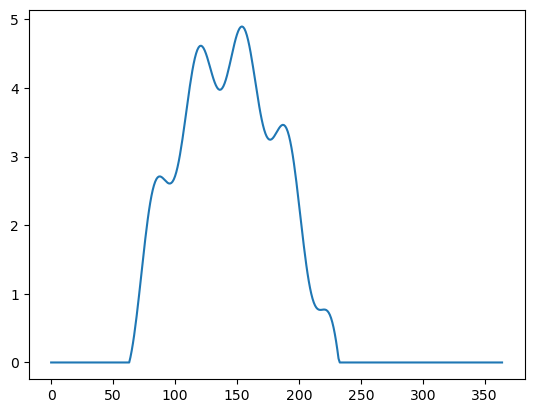

In [3]:
melt = snow_melt(365,5,-0.5,70,0.5,10)
plt.plot(melt)

In [4]:
np.cos(0.5 * np.pi)

6.123233995736766e-17

In [5]:
#fixed params
T = 365  # Total time

#variable params 
k = 0.05
ps_lambda = 0.1  # Parameter for the Poisson distribution
wb_k = 1
wb_lambda = 2

A1 = 1
B1 = -0.5
ph = 70
A2 = 0.5
F2 = 10

# start_melt = 90
# end_melt = 150

def analytical_hydrographs( k, ps_lambda,
                           wb_k,
                           wb_lambda,
                           A1,
                           B1,
                           ph,
                           A2,
                           F2):
    melt = snow_melt(T,A1,B1,ph,A2,F2)
    # find which index in melt is the first non-zero value
    winter = 0
    for i,m in enumerate(melt):
        if m>0:
            winter = i 
            break 
    print(winter)

    ksi = rain_binary(T, ps_lambda)
    ksi[:winter] = 0

    rain = rain_weibull(ksi,wb_k,wb_lambda)

    plt.figure()
    Q = Q_rain(T, k, rain)
    plt.plot(Q)

    Q_snow = Q_rain_snow(T, k, rain, melt)
    plt.plot(Q_snow)

In [6]:
interact(analytical_hydrographs, k = (0.05,1,0.05),
         ps_lambda = (0.01,0.2,0.01),
         wb_k = (0.5,2,0.5),
         wb_lambda = (1,5,1),
         A1 = (1,3,1),
         B1 = (-1,-0.5,0.1),
         ph = fixed(70),
         A2 = fixed(0.5),
         F2 = fixed(10)

         )

interactive(children=(FloatSlider(value=0.5, description='k', max=1.0, min=0.05, step=0.05), FloatSlider(value…

<function __main__.analytical_hydrographs(k, ps_lambda, wb_k, wb_lambda, A1, B1, ph, A2, F2)>

In [7]:
 from SwissStations import *
S = SwissStation('Jonschwil')
S.read_station(2000,2020,"/home/pwiersma/scratch/Data/ewatercycle/Discharge_data")
Q=S.obs

<Axes: xlabel='time'>

<Figure size 640x480 with 0 Axes>

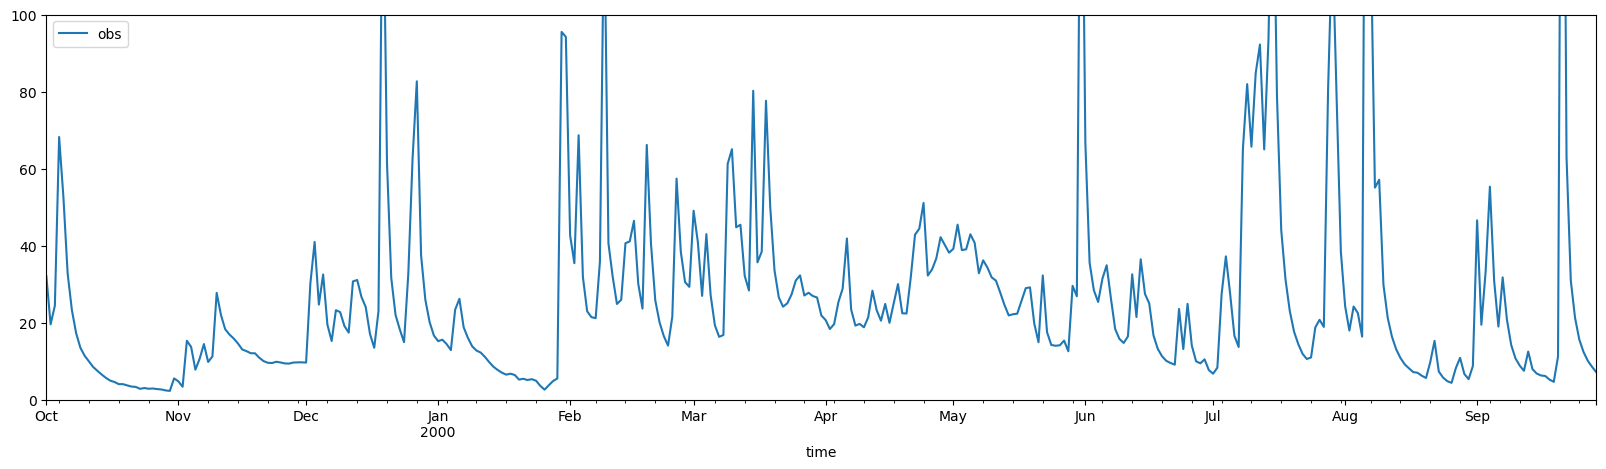

<Figure size 640x480 with 0 Axes>

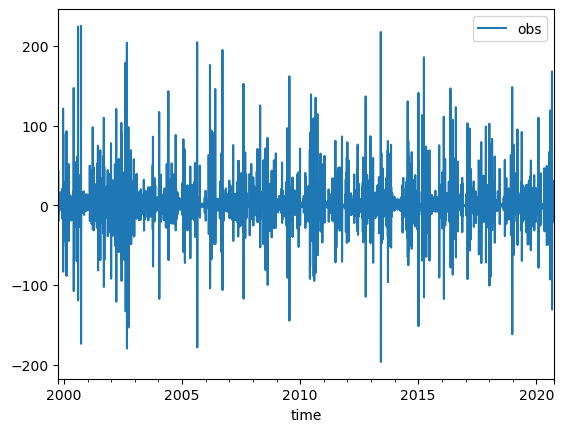

<Figure size 3000x500 with 0 Axes>

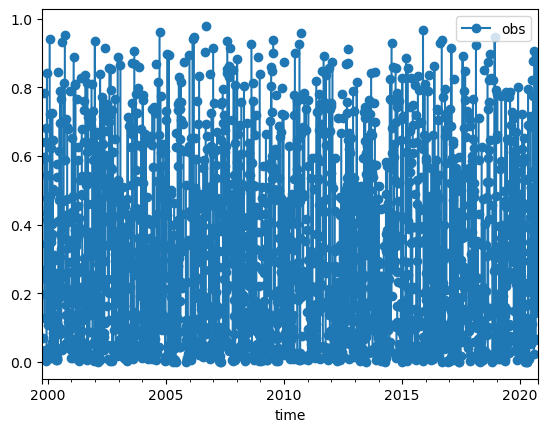

In [79]:
plt.figure()

Q[:365].plot(figsize = (20,5))
plt.ylim(0,100)
plt.figure()
Q.diff().plot()
k = Q.diff() / Q
plt.figure(figsize = (30,5))
k[k>0].plot(linestyle = None, marker = 'o')

In [34]:
kmonths = pd.DataFrame(columns = range(1,13), index = np.arange(len(k)))

In [72]:
df = k[k>0] 
# Assuming your timeseries is in a DataFrame df with 'date' and 'value' columns
df['month'] = df.index.month

# Group by month
grouped = df.groupby('month')['obs']

# Convert the GroupBy object to a DataFrame
df_grouped = pd.DataFrame({month: group for month, group in grouped})

df_grouped = df_grouped.reset_index(drop = True)

Text(0.5, 1.0, 'Inlfation rate of the hydrograph per month - Jonschwil')

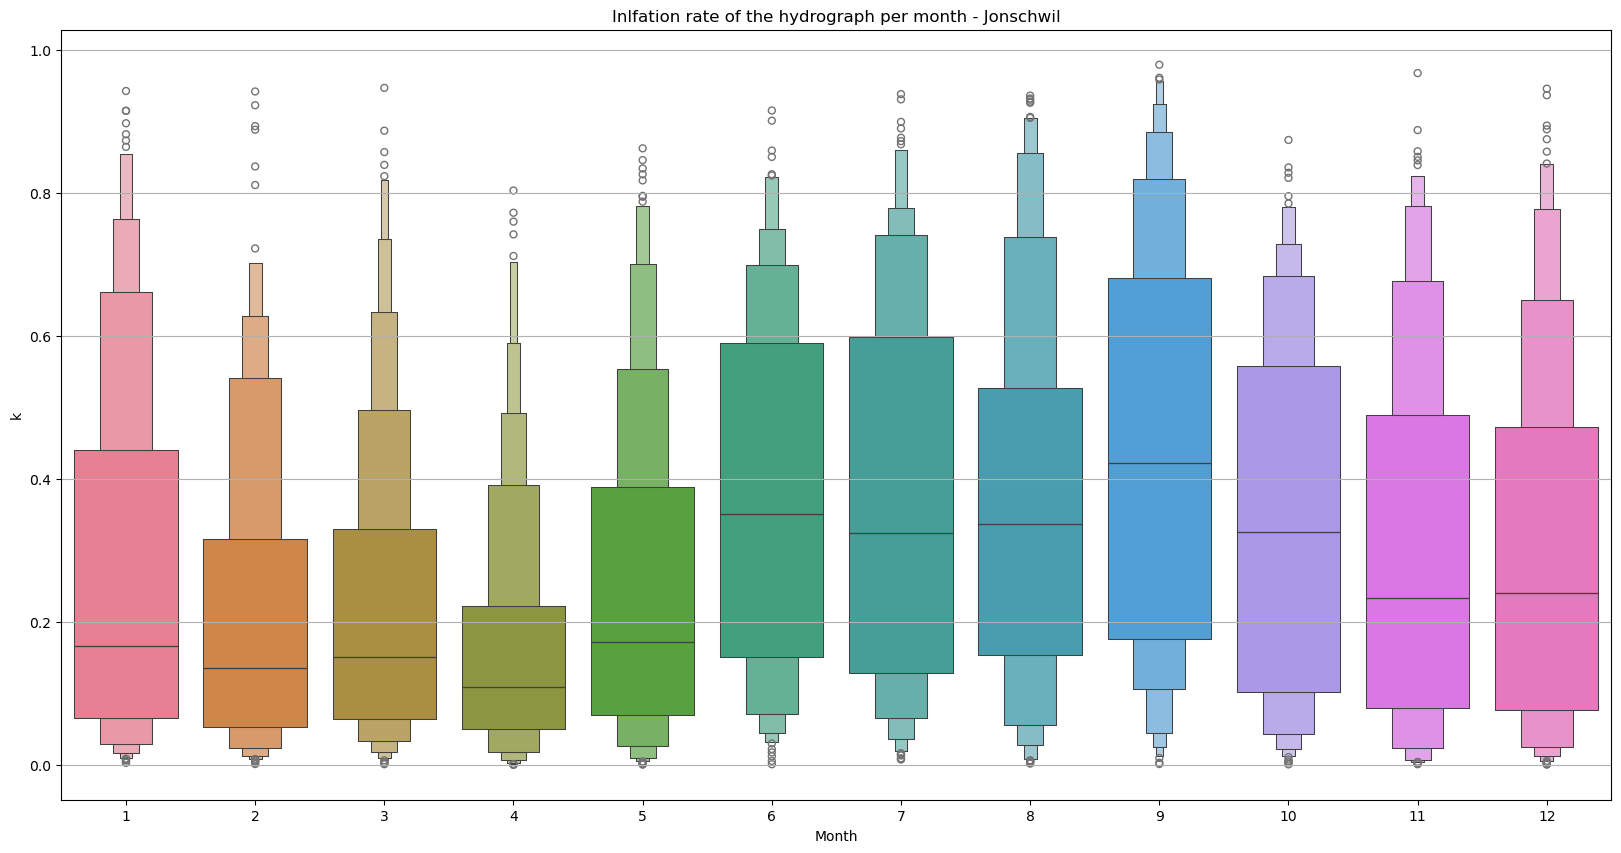

In [80]:
plt.figure(figsize = (20,10))
plt.grid()
sns.boxenplot(data = df_grouped,outlier_prop = 0.1, k_depth='proportion')
# plt.ylim(0,1.5)
plt.ylabel('k')
plt.xlabel('Month')
plt.title('Inlfation rate of the hydrograph per month - Jonschwil')

<Axes: xlabel='time'>

<Figure size 640x480 with 0 Axes>

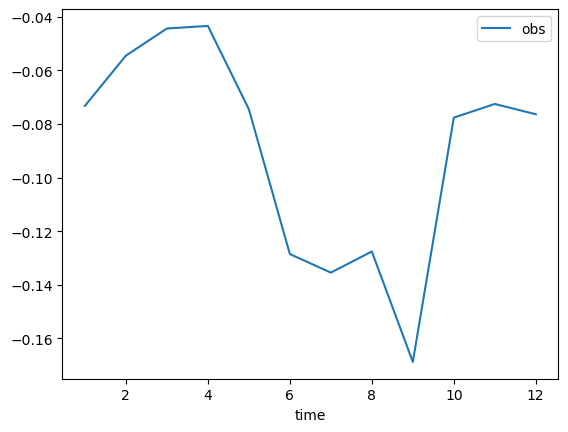

<Figure size 640x480 with 0 Axes>

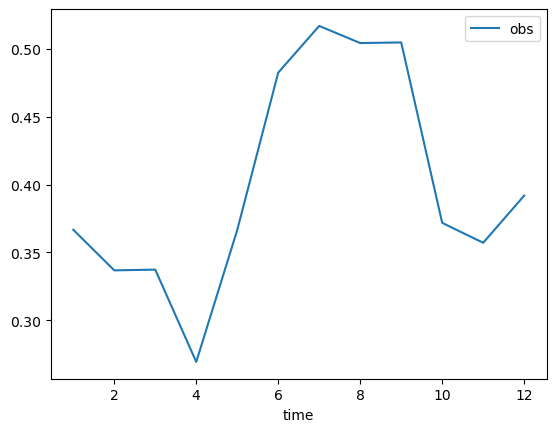

In [14]:
bymonth = k.groupby(k.index.month)
plt.figure()
bymonth.mean().plot()

plt.figure()
bymonth.std().plot()

<Axes: xlabel='time'>

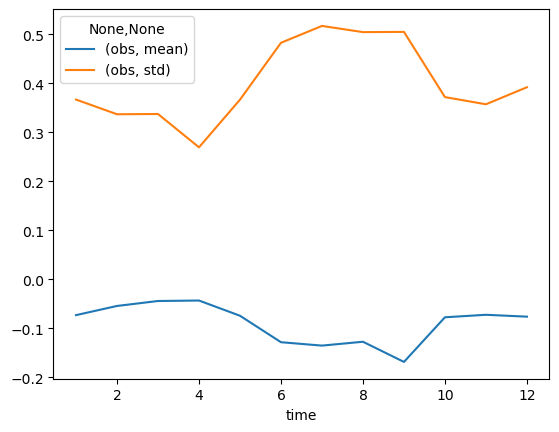